# Pymaceuticals Inc.
---

### Analysis

- The sex distribution of the mice studied was about 50%-50%.
- Capomulin treatment appears to have decreased tumor volume in L509
- There appears to be a reasonably strong correlation between mouse weight (g) and tumor volume (mm3)
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
n_mice = len(mouse_metadata['Mouse ID'].unique())
n_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
find_duplicate = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
find_duplicate['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
find_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.copy()
for index, row in clean_df.iterrows():
    if row['Mouse ID'] == 'g989':
        clean_df = clean_df.drop(index=index)

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_n_mice = len(clean_df.groupby(['Mouse ID']))
new_n_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
col_labels = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

regimens = clean_df.groupby(['Drug Regimen'])['Drug Regimen'].unique()

mean_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().tolist()
median_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().tolist()
variance_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().tolist()
std_dev_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().tolist()
std_err_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().tolist()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame()
summary_df[col_labels[0]] = regimens
summary_df[col_labels[1]] = mean_volume
summary_df[col_labels[2]] = median_volume
summary_df[col_labels[3]] = variance_volume
summary_df[col_labels[4]] = std_dev_volume
summary_df[col_labels[5]] = std_err_volume

summary_df = summary_df.drop(labels='Drug Regimen', axis=1)

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
unique_tp_df = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
unique_tp_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

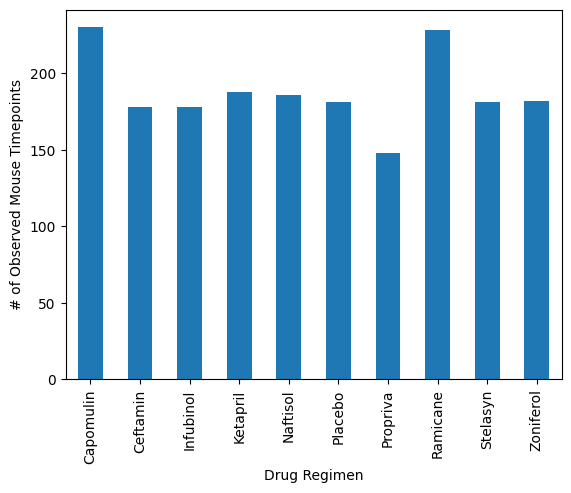

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_tp_df.plot.bar(x='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

<Axes: ylabel='count'>

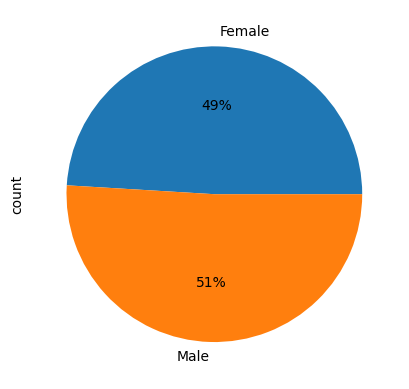

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_gender_df = clean_df.groupby(['Sex']).count()['Timepoint']
unique_gender_df.plot.pie(label='count', autopct='%1.0f%%')
# Get the unique mice with their gender


# Make the pie chart


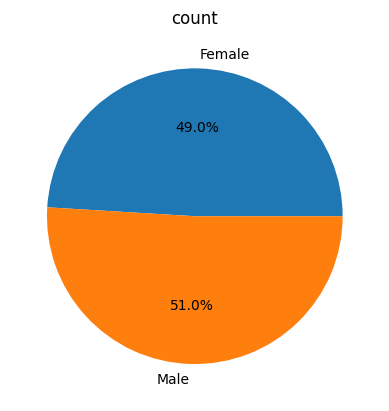

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(unique_gender_df, labels=clean_df['Sex'].unique(), autopct='%1.1f%%')
plt.title('count')
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

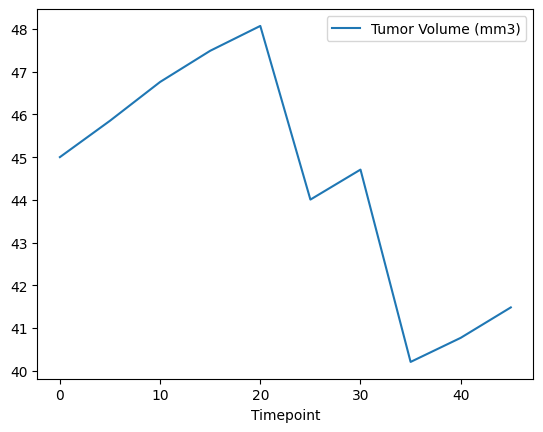

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
i509_df = clean_df[clean_df['Mouse ID'] == 'l509']
i509_df.plot(x='Timepoint', y='Tumor Volume (mm3)')

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

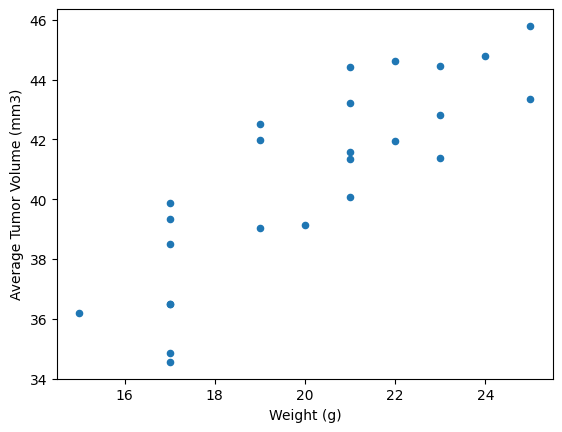

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_df = capomulin_df.sort_values(by='Mouse ID')
mouse_metadata = mouse_metadata.sort_values(by='Mouse ID')

to_plot_df = pd.DataFrame()

to_plot_df['Mouse ID'] = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']['Mouse ID'].tolist()
to_plot_df['Average Tumor Volume (mm3)'] = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean().tolist()
to_plot_df['Weight (g)'] = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']['Weight (g)'].tolist()

to_plot_df.plot.scatter(x='Weight (g)', y='Average Tumor Volume (mm3)')


## Correlation and Regression

Correlation is: 0.8419363424694721


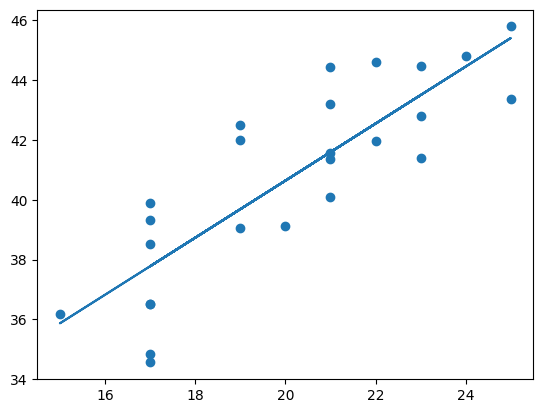

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_df = pd.DataFrame()
corr_df['Weight (g)'] = pd.to_numeric(to_plot_df['Weight (g)'])
corr_df['Average Tumor Volume (mm3)'] = pd.to_numeric(to_plot_df['Average Tumor Volume (mm3)'])
print("Correlation is:", corr_df['Weight (g)'].corr(corr_df['Average Tumor Volume (mm3)']))

reg = st.linregress(x=corr_df['Weight (g)'], y=corr_df['Average Tumor Volume (mm3)'])
prediction = reg.intercept + reg.slope * corr_df['Weight (g)']

plt.scatter(x=corr_df['Weight (g)'], y=corr_df['Average Tumor Volume (mm3)'])
plt.plot(corr_df['Weight (g)'], prediction)
